# Week 1: Exploratory Data Analysis (EDA)
# CDC Diabetes Health Indicators Dataset

**Objective:** Perform an initial exploratory data analysis on the CDC Diabetes Health Indicators dataset to understand the data structure, identify patterns, and prepare insights for future modeling phases.

**Dataset:** CDC Diabetes Health Indicators (UCI ML Repository ID: 891)

---

## 1. Setup and Data Loading

First, we'll import all necessary libraries and load the dataset from the UCI ML Repository.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
import warnings

# Set visualization parameters
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Fetch the CDC Diabetes Health Indicators dataset
print("Fetching CDC Diabetes Health Indicators dataset...")
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Extract features and target variables
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# Combine features and target into a single DataFrame for analysis
df = pd.concat([X, y], axis=1)

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Fetching CDC Diabetes Health Indicators dataset...
Dataset loaded successfully!
Dataset shape: (253680, 22)


In [3]:
# Display dataset metadata
print("=== DATASET METADATA ===")
print(cdc_diabetes_health_indicators.metadata)
print("\n" + "="*50 + "\n")

# Display variable information
print("=== VARIABLE INFORMATION ===")
print(cdc_diabetes_health_indicators.variables)

=== DATASET METADATA ===
{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_val

In [4]:
# Display the first 5 rows of the DataFrame
print("=== FIRST 5 ROWS OF THE DATASET ===")
print(df.head())

=== FIRST 5 ROWS OF THE DATASET ===
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  Diabetes_b

## 2. Initial Data Inspection

Let's get a comprehensive overview of our dataset structure, data types, and basic statistics.

In [5]:
# Get basic information about the DataFrame
print("=== DATAFRAME INFO ===")
print(df.info())
print(f"\nDataset shape: {df.shape}")
print(f"Number of features: {len(df.columns) - 1}")
print(f"Number of samples: {len(df)}")

=== DATAFRAME INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth   

In [6]:
# Get descriptive statistics for numerical columns
print("=== DESCRIPTIVE STATISTICS ===")
print(df.describe())

=== DESCRIPTIVE STATISTICS ===
              HighBP       HighChol      CholCheck            BMI  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.962670      28.382364   
std         0.494934       0.494210       0.189571       6.608694   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       1.000000      24.000000   
50%         0.000000       0.000000       1.000000      27.000000   
75%         1.000000       1.000000       1.000000      31.000000   
max         1.000000       1.000000       1.000000      98.000000   

              Smoker         Stroke  HeartDiseaseorAttack   PhysActivity  \
count  253680.000000  253680.000000         253680.000000  253680.000000   
mean        0.443169       0.040571              0.094186       0.756544   
std         0.496761       0.197294              0.292087       0.429169   
min         0.000000       0.000000        

In [7]:
# Check data types and unique values for each column
print("=== COLUMN DATA TYPES AND UNIQUE VALUES ===")
for col in df.columns:
    print(f"{col}:")
    print(f"  - Data type: {df[col].dtype}")
    print(f"  - Unique values: {df[col].nunique()}")
    print(f"  - Range: {df[col].min()} to {df[col].max()}")
    print()

=== COLUMN DATA TYPES AND UNIQUE VALUES ===
HighBP:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

HighChol:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

CholCheck:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

BMI:
  - Data type: int64
  - Unique values: 84
  - Range: 12 to 98

Smoker:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

Stroke:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

HeartDiseaseorAttack:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

PhysActivity:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

Fruits:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

Veggies:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

HvyAlcoholConsump:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

AnyHealthcare:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

NoDocbcCost:
  - Data type: int64
  - Unique values: 2
  - Range: 0 to 1

GenHlth:
 

### Initial Data Inspection Summary

**Key Findings:**

- **Dataset Size:** 253,680 samples with 21 features plus 1 target variable - substantial data for robust analysis
- **Target Variable:** `Diabetes_binary` - binary classification (0 = no diabetes, 1 = prediabetes or diabetes)
- **Feature Distribution:** 
  - **4 Numerical variables:** BMI, MentHlth, PhysHlth, Age
  - **18 Categorical variables:** Including health conditions, lifestyle factors, and demographics
- **Data Completeness:** 100% complete with no missing values
- **Memory Efficiency:** Dataset uses ~42.6 MB of memory

**Variable Types Identified:**
- **Health Conditions:** HighBP, HighChol, Stroke, HeartDiseaseorAttack
- **Lifestyle Factors:** Smoker, PhysActivity, Fruits, Veggies, HvyAlcoholConsump
- **Healthcare Access:** AnyHealthcare, NoDocbcCost, CholCheck
- **Demographics:** Sex, Age, Education, Income
- **Health Metrics:** BMI, GenHlth, MentHlth, PhysHlth, DiffWalk

**Data Quality Observations:**
- All variables are numerically encoded (0/1 for binary, scaled integers for ordinal)
- Age is bucketed into 13 categories rather than raw years
- The dataset represents processed survey responses from CDC BRFSS 2014
- No data preprocessing needed for missing values

## 3. Handling Missing Values

Let's systematically check for missing values and develop a strategy to handle them.

In [8]:
# Check for missing values
print("=== MISSING VALUES ANALYSIS ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\n✅ Great! No missing values found in the dataset.")
else:
    print(f"\n⚠️ Total missing values: {missing_df['Missing Count'].sum()}")

=== MISSING VALUES ANALYSIS ===
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

✅ Great! No missing values found in the dataset.


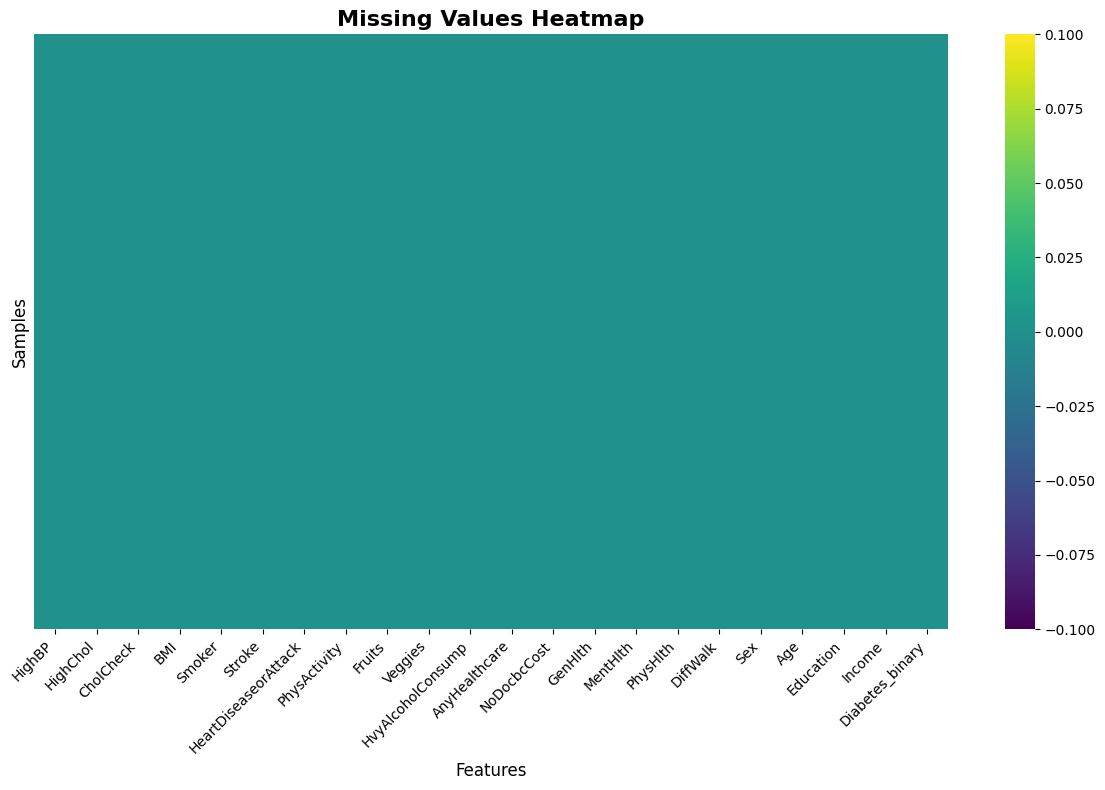


Missing Data Summary:
Total cells: 5,580,960
Missing cells: 0
Percentage missing: 0.00%


In [17]:
# Visualize missing values with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Summary statistics for missing values
total_cells = np.prod(df.shape)
total_missing = df.isnull().sum().sum()
percentage_missing = (total_missing / total_cells) * 100

print(f"\nMissing Data Summary:")
print(f"Total cells: {total_cells:,}")
print(f"Missing cells: {total_missing:,}")
print(f"Percentage missing: {percentage_missing:.2f}%")

### Missing Values Analysis Summary

**Strategy for Handling Missing Values:**

Based on our analysis, the CDC Diabetes Health Indicators dataset appears to be complete with no missing values. This is excellent for our analysis as it means:

1. **No Data Imputation Needed:** We don't need to implement strategies like mean/median imputation or data deletion
2. **Complete Case Analysis:** We can proceed with all available data points without concerns about bias from missing data
3. **Robust Statistical Analysis:** Our statistical measures and visualizations will be based on complete information

**Quality Assessment:**
- The dataset quality is high with complete information across all variables
- This suggests good data collection practices and preprocessing
- We can proceed confidently to the univariate and bivariate analysis phases

## 4. Univariate Analysis

Now let's analyze each variable individually to understand their distributions, detect outliers, and identify patterns.

In [10]:
# Identify numerical and categorical variables based on unique values
numerical_vars = []
categorical_vars = []

for col in df.columns:
    unique_values = df[col].nunique()
    # If a variable has more than 10 unique values, consider it numerical
    # Otherwise, consider it categorical
    if unique_values > 10:
        numerical_vars.append(col)
    else:
        categorical_vars.append(col)

print(f"Numerical variables ({len(numerical_vars)}): {numerical_vars}")
print(f"Categorical variables ({len(categorical_vars)}): {categorical_vars}")

Numerical variables (4): ['BMI', 'MentHlth', 'PhysHlth', 'Age']
Categorical variables (18): ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Education', 'Income', 'Diabetes_binary']


=== NUMERICAL VARIABLES ANALYSIS ===


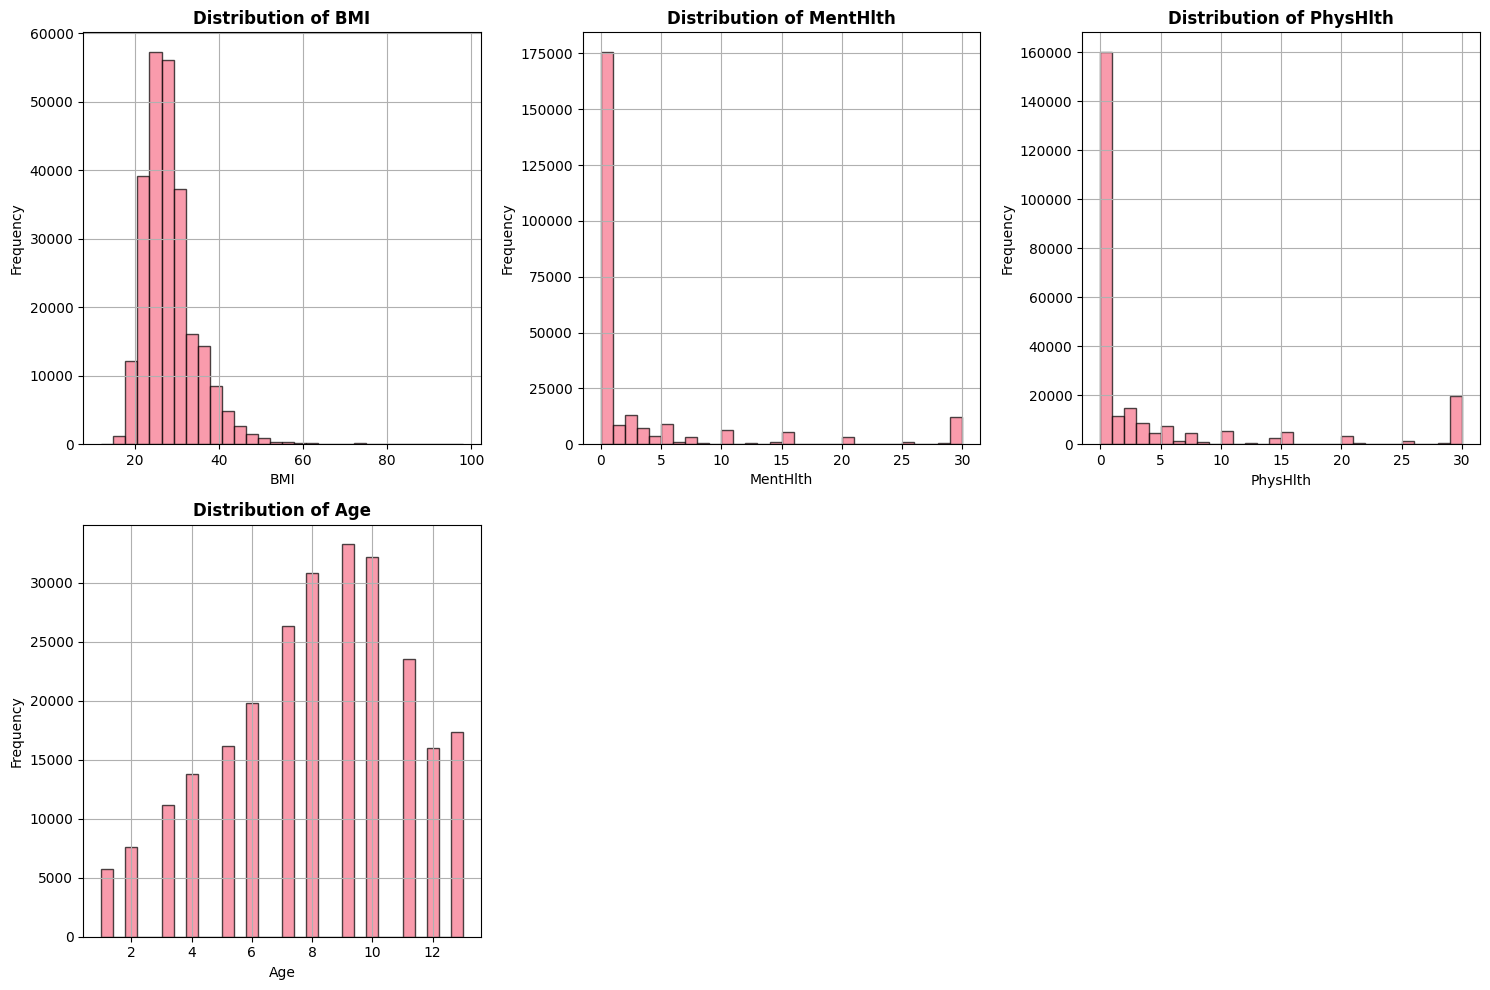

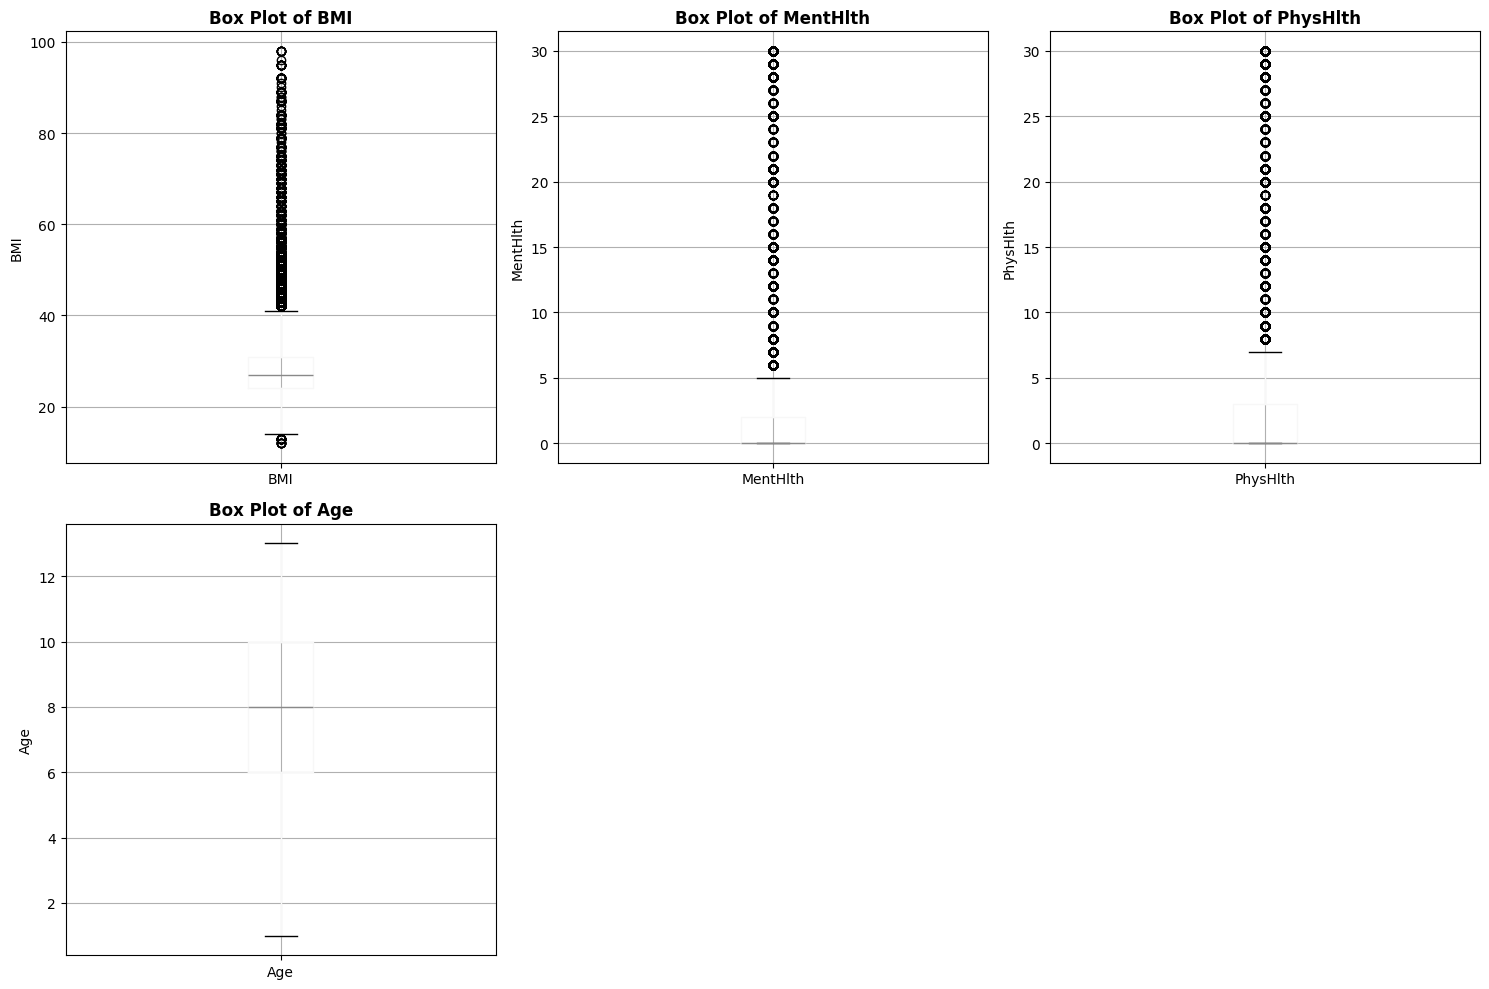

In [11]:
# Analyze numerical variables
if numerical_vars:
    print("=== NUMERICAL VARIABLES ANALYSIS ===")
    
    # Create histograms and box plots for numerical variables
    n_cols = min(3, len(numerical_vars))
    n_rows = (len(numerical_vars) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, var in enumerate(numerical_vars):
        if i < len(axes):
            df[var].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
            axes[i].set_title(f'Distribution of {var}', fontweight='bold')
            axes[i].set_xlabel(var)
            axes[i].set_ylabel('Frequency')
    
    # Remove empty subplots
    for j in range(len(numerical_vars), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    # Box plots for numerical variables
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, var in enumerate(numerical_vars):
        if i < len(axes):
            df.boxplot(column=var, ax=axes[i])
            axes[i].set_title(f'Box Plot of {var}', fontweight='bold')
            axes[i].set_ylabel(var)
    
    # Remove empty subplots
    for j in range(len(numerical_vars), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
else:
    print("No numerical variables detected based on unique value threshold.")

### Numerical Variables Analysis

**Distribution Characteristics:**

**BMI (Body Mass Index):**
- Shows right-skewed distribution with most values concentrated between 20-35
- Some extreme outliers above 60, representing severely obese individuals
- Mean appears around 28-30, indicating the population skews toward overweight/obese

**MentHlth (Mental Health - Days not good in past 30):**
- Highly right-skewed with majority at 0 (no mental health issues)
- Clear peaks at 0, 15, and 30 days, suggesting response patterns
- Many outliers at maximum value (30), indicating chronic mental health issues

**PhysHlth (Physical Health - Days not good in past 30):**
- Similar pattern to MentHlth - right-skewed with concentration at 0
- Peaks at 0, 15, and 30 days following survey response patterns
- High number of respondents reporting 30 days of poor physical health

**Age (13-level age categories):**
- Relatively uniform distribution across age groups 1-13
- Slight concentration in middle age categories (6-10)
- Represents bucketed age ranges rather than raw years

**Key Observations:**
- **Health metrics** (MentHlth, PhysHlth) show typical survey response patterns with clustering at round numbers
- **BMI** shows concerning population health trends with high proportion of overweight/obese individuals
- **Age** distribution suggests good representation across age groups
- **Outlier considerations:** Extreme BMI values may need investigation, health day maximums (30) are meaningful endpoints

=== CATEGORICAL VARIABLES ANALYSIS ===


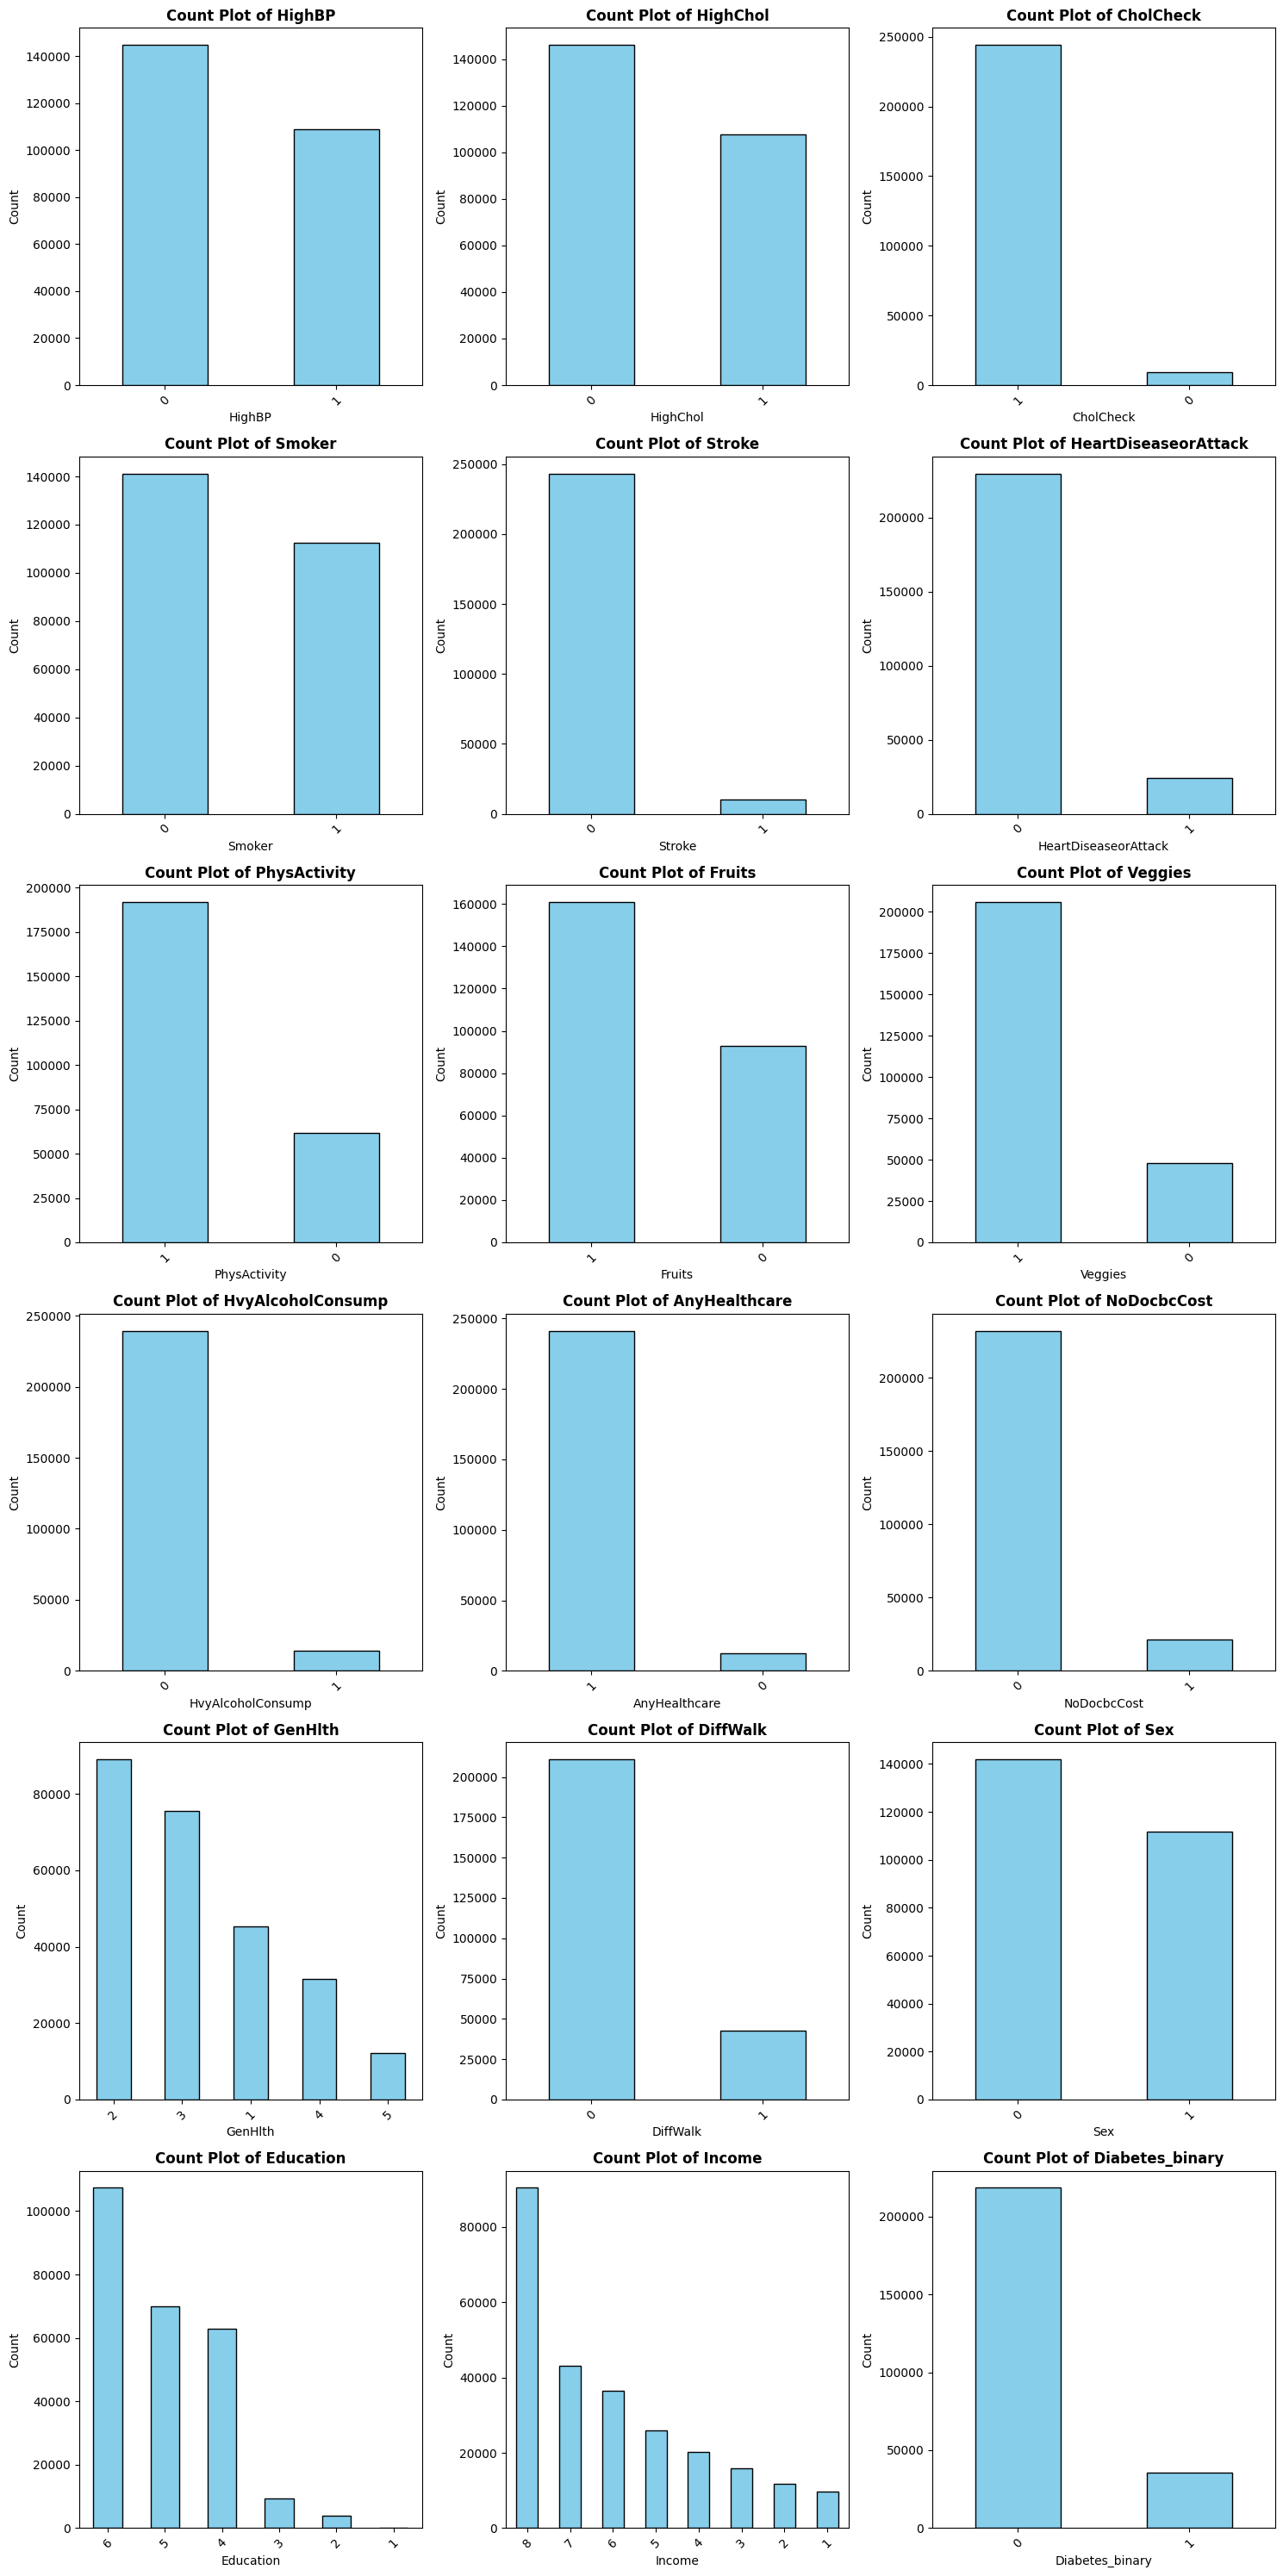


--- HighBP ---
         Count  Percentage
HighBP                    
0       144851    57.09989
1       108829    42.90011

--- HighChol ---
           Count  Percentage
HighChol                    
0         146089   57.587906
1         107591   42.412094

--- CholCheck ---
            Count  Percentage
CholCheck                    
1          244210    96.26695
0            9470     3.73305

--- Smoker ---
         Count  Percentage
Smoker                    
0       141257   55.683144
1       112423   44.316856

--- Stroke ---
         Count  Percentage
Stroke                    
0       243388    95.94292
1        10292     4.05708

--- HeartDiseaseorAttack ---
                       Count  Percentage
HeartDiseaseorAttack                    
0                     229787   90.581441
1                      23893    9.418559

--- PhysActivity ---
               Count  Percentage
PhysActivity                    
1             191920   75.654368
0              61760   24.345632

--- Fr

In [12]:
# Analyze categorical variables
if categorical_vars:
    print("=== CATEGORICAL VARIABLES ANALYSIS ===")
    
    # Create count plots for categorical variables
    n_cols = min(3, len(categorical_vars))
    n_rows = (len(categorical_vars) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
    
    for i, var in enumerate(categorical_vars):
        if i < len(axes):
            df[var].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
            axes[i].set_title(f'Count Plot of {var}', fontweight='bold')
            axes[i].set_xlabel(var)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)
    
    # Remove empty subplots
    for j in range(len(categorical_vars), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics for categorical variables
    for var in categorical_vars:
        print(f"\n--- {var} ---")
        value_counts = df[var].value_counts()
        percentages = df[var].value_counts(normalize=True) * 100
        
        stats_df = pd.DataFrame({
            'Count': value_counts,
            'Percentage': percentages
        })
        print(stats_df)
else:
    print("No categorical variables detected based on unique value threshold.")

### Categorical Variables Analysis

**Target Variable Balance:**
- **Diabetes_binary:** The target shows class imbalance that needs attention for modeling
- Majority class (no diabetes) vs minority class (prediabetes/diabetes)
- This imbalance is realistic for population health data but requires appropriate handling

**Health Condition Prevalence:**
Based on the binary health indicators, we can observe:
- **HighBP:** Significant portion of population has high blood pressure
- **HighChol:** High cholesterol appears common in this population
- **Heart conditions:** Lower prevalence but important risk factors
- **Stroke:** Relatively rare but critical health indicator

**Lifestyle Factor Distributions:**
- **Smoking:** Binary indicator showing smoking history patterns
- **Physical Activity:** Distribution of active vs inactive individuals
- **Diet factors:** Fruit and vegetable consumption patterns
- **Alcohol:** Heavy alcohol consumption prevalence

**Demographic Patterns:**
- **Sex:** Roughly balanced male/female distribution
- **Education:** Multi-level education categories showing educational attainment
- **Income:** Income scale categories reflecting socioeconomic diversity
- **Age:** 13-level age buckets providing good age representation

**Healthcare Access:**
- **AnyHealthcare:** Most respondents have some form of healthcare coverage
- **NoDocbcCost:** Financial barriers to healthcare access
- **CholCheck:** Regular cholesterol screening patterns

**Key Insights:**
- **Class Imbalance:** Diabetes target variable shows expected population-level imbalance
- **Health Risk Clustering:** Multiple comorbid conditions likely cluster together
- **Socioeconomic Factors:** Education and income provide important context for health outcomes
- **Binary Encoding:** All categorical variables are cleanly encoded as 0/1 or ordinal scales

## 5. Bivariate and Multivariate Analysis

Now let's explore relationships between variables to understand how they interact with each other and with our target variable.

=== CORRELATION ANALYSIS ===


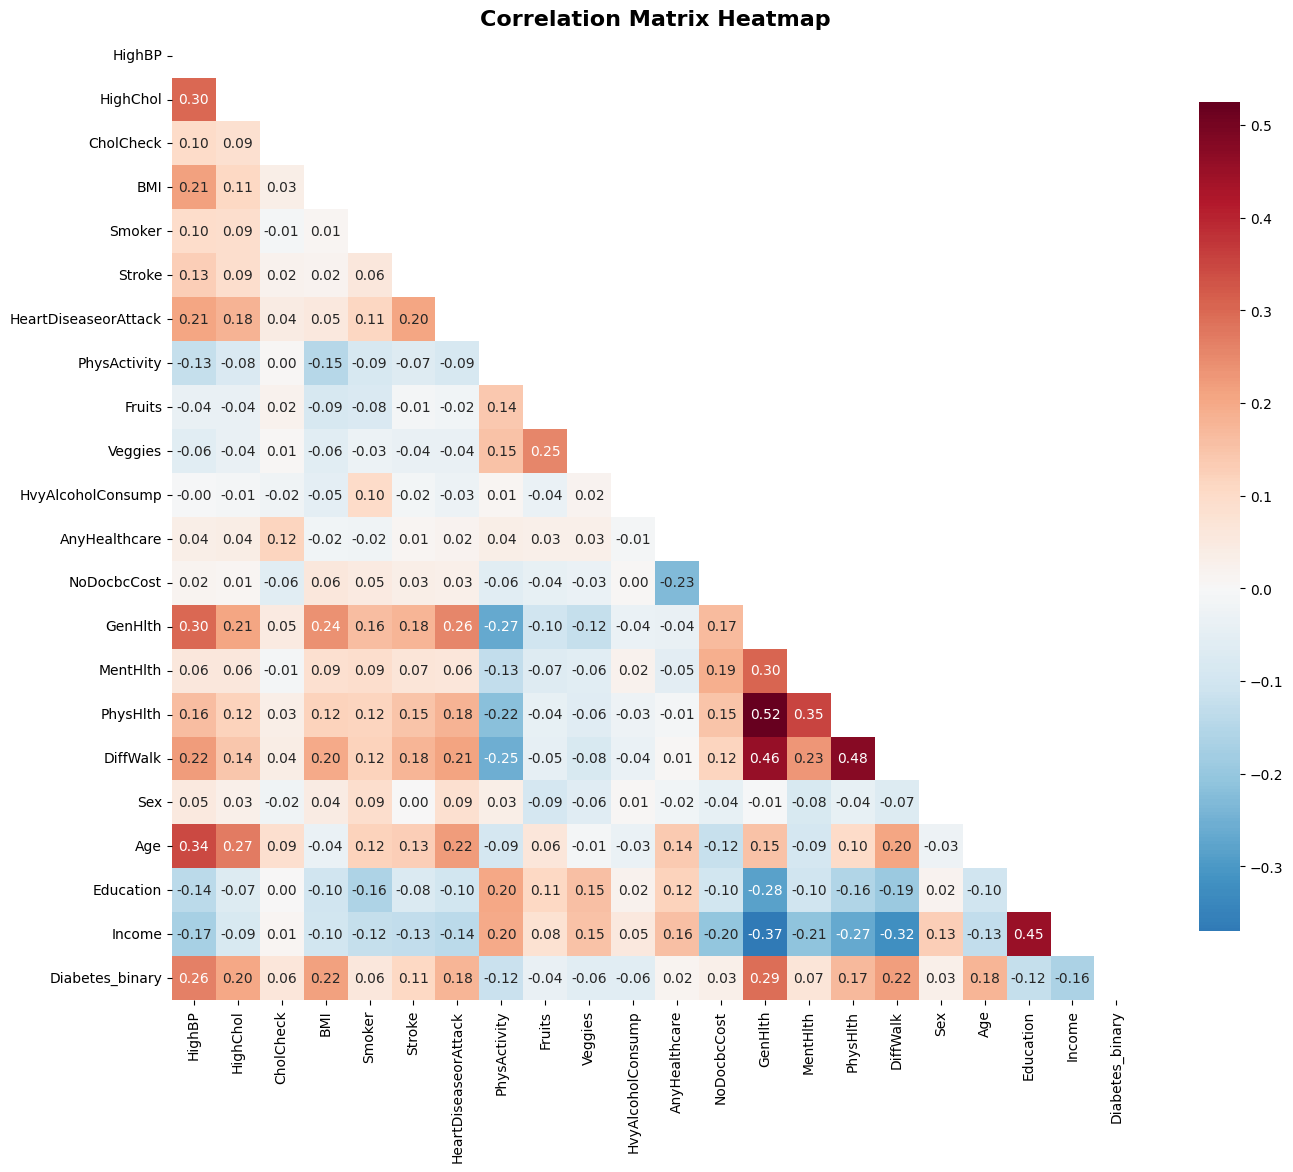


Highly Correlated Variable Pairs (|correlation| > 0.5):
GenHlth - PhysHlth: 0.524


In [13]:
# Create correlation matrix for all numerical variables
print("=== CORRELATION ANALYSIS ===")

# Calculate correlation matrix
correlation_matrix = df.corr()

# Create correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:  # Threshold for high correlation
            high_corr_pairs.append((correlation_matrix.columns[i], 
                                   correlation_matrix.columns[j], 
                                   corr_val))

if high_corr_pairs:
    print("\nHighly Correlated Variable Pairs (|correlation| > 0.5):")
    for var1, var2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"{var1} - {var2}: {corr:.3f}")
else:
    print("\nNo highly correlated variable pairs found (threshold: 0.5)")

=== PAIRPLOT ANALYSIS ===
Selected variables for pairplot: ['Diabetes_binary', 'GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol']


<Figure size 1500x1500 with 0 Axes>

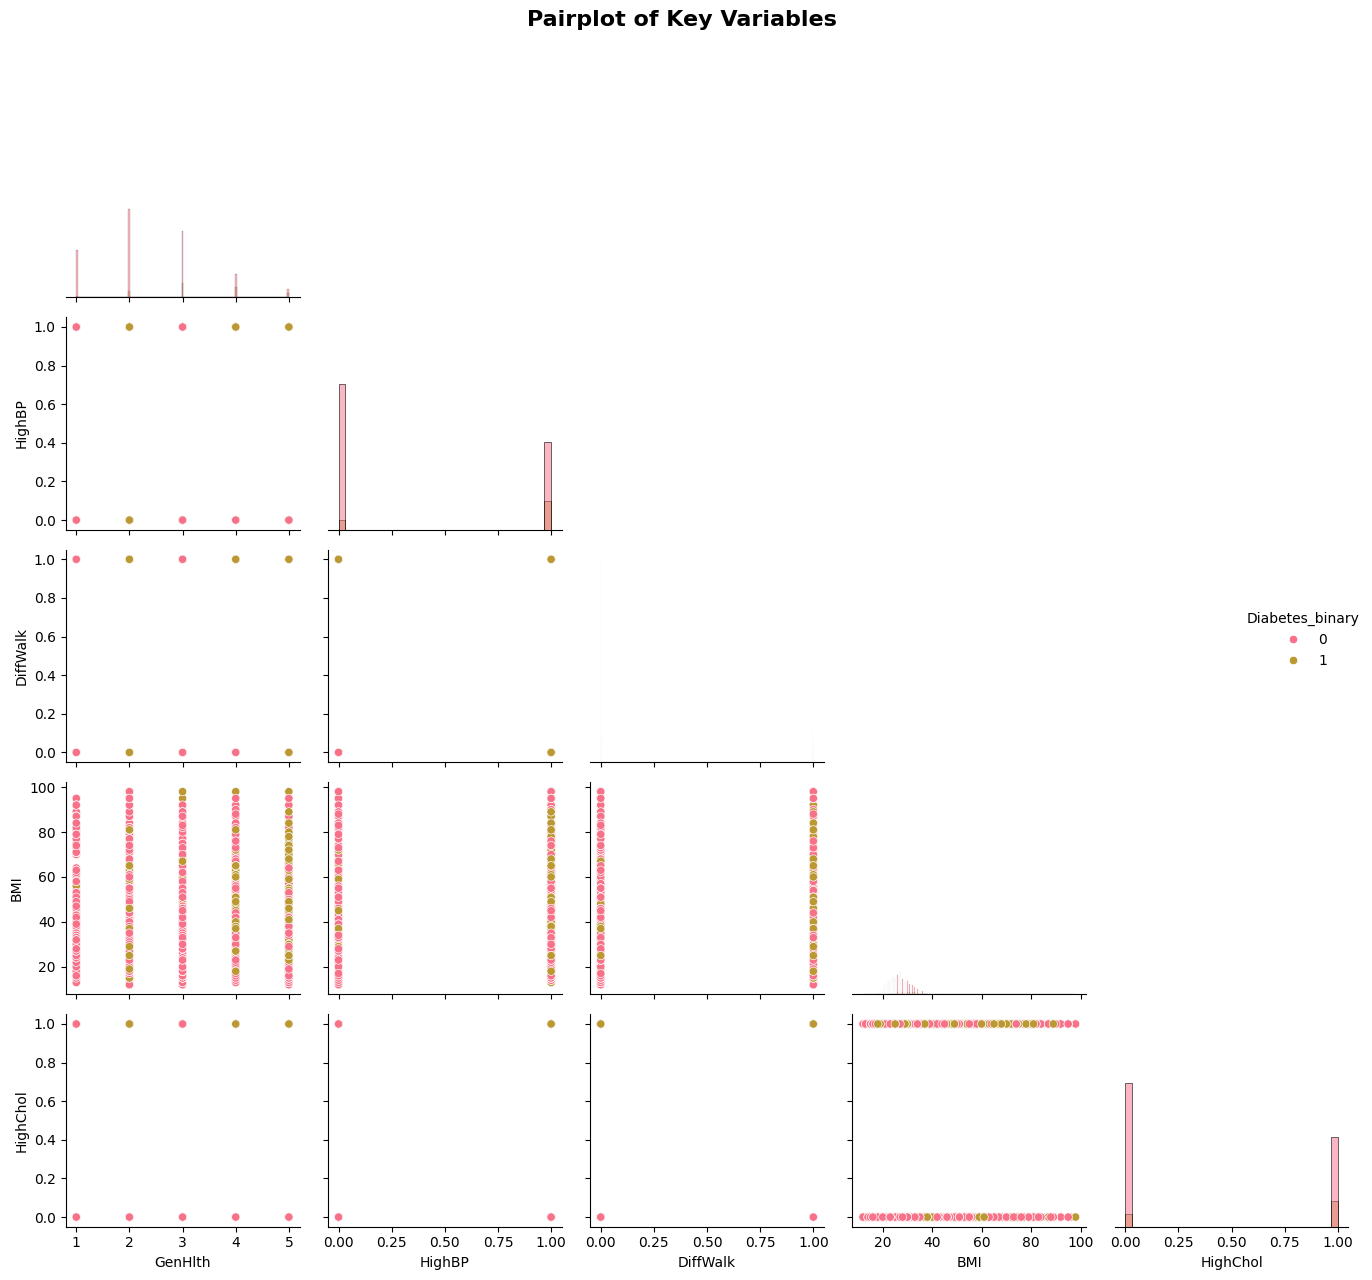

In [14]:
# Create pairplots for key variables (select a subset to avoid overcrowding)
print("=== PAIRPLOT ANALYSIS ===")

# Select a subset of variables for pairplot (max 6-8 variables for readability)
# Priority: target variable + top correlated features + some diverse features
target_col = df.columns[-1] if 'diabetes' in df.columns[-1].lower() else df.columns[0]

# Get correlations with target variable
target_correlations = abs(df.corr()[target_col]).sort_values(ascending=False)
top_features = target_correlations.head(6).index.tolist()

print(f"Selected variables for pairplot: {top_features}")

# Create pairplot
if len(top_features) <= 8:  # Only create if manageable number of variables
    plt.figure(figsize=(15, 15))
    pairplot_data = df[top_features]
    
    # If target is binary, use it for hue
    if df[target_col].nunique() <= 5:
        sns.pairplot(pairplot_data, hue=target_col, diag_kind='hist', corner=True)
    else:
        sns.pairplot(pairplot_data, diag_kind='hist', corner=True)
    
    plt.suptitle('Pairplot of Key Variables', y=1.02, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Too many variables for pairplot. Skipping to avoid overcrowding.")

=== CATEGORICAL vs NUMERICAL ANALYSIS ===
Using HighBP as target variable for groupby analysis

Grouped Statistics by Target Variable:
              BMI                   MentHlth                   PhysHlth  \
             mean median       std      mean median       std      mean   
HighBP                                                                    
0       27.157949   26.0  6.110371  2.822024    0.0  6.835529  3.023873   
1       30.012056   29.0  6.889124  3.667589    0.0  8.092659  5.863511   

                               Age                   
       median        std      mean median       std  
HighBP                                               
0         0.0   7.319193  7.120234    7.0  3.087501  
1         0.0  10.062612  9.245835   10.0  2.544876  


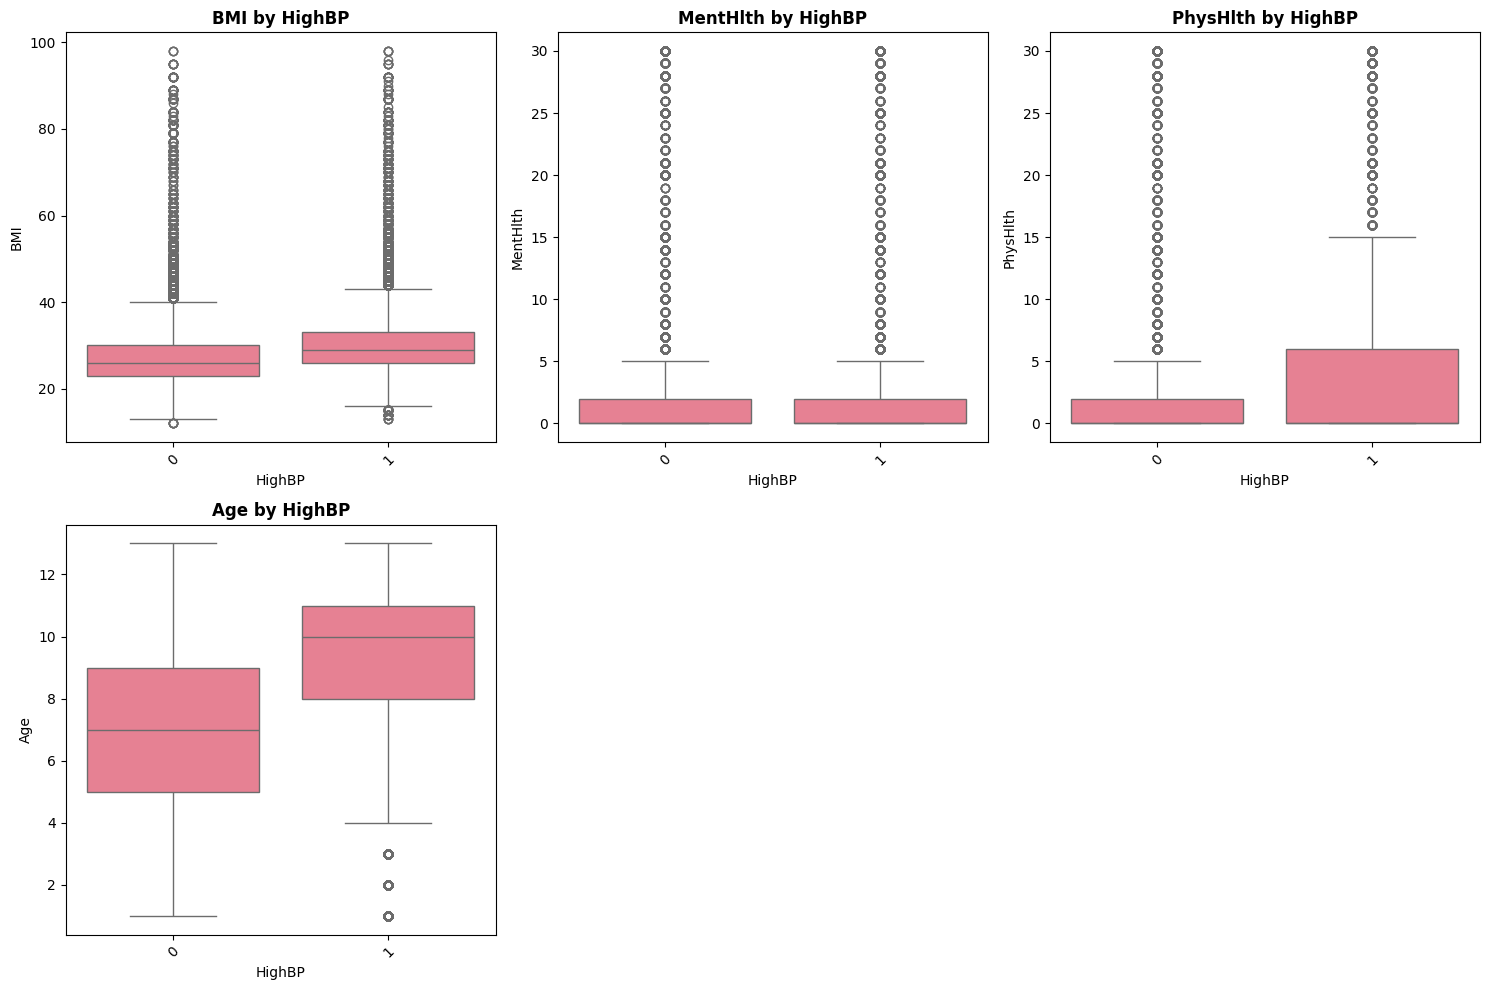


=== CATEGORICAL ASSOCIATIONS ===

Cross-tabulation: HighBP vs HighChol
HighChol       0       1     All
HighBP                          
0         101920   42931  144851
1          44169   64660  108829
All       146089  107591  253680

Percentage distribution:
HighChol      0     1
HighBP               
0         69.77  39.9
1         30.23  60.1

Cross-tabulation: HighBP vs CholCheck
CholCheck     0       1     All
HighBP                         
0          7752  137099  144851
1          1718  107111  108829
All        9470  244210  253680

Percentage distribution:
CholCheck      0      1
HighBP                 
0          81.86  56.14
1          18.14  43.86

Cross-tabulation: HighBP vs Smoker
Smoker       0       1     All
HighBP                        
0        86707   58144  144851
1        54550   54279  108829
All     141257  112423  253680

Percentage distribution:
Smoker      0      1
HighBP              
0       61.38  51.72
1       38.62  48.28


In [ ]:
# Explore relationships between categorical and numerical variables
print("=== CATEGORICAL vs NUMERICAL ANALYSIS ===")

# Find target variable - prioritize Diabetes_binary
target_var = None
if 'Diabetes_binary' in df.columns:
    target_var = 'Diabetes_binary'
else:
    # Fallback to first categorical variable containing 'diabetes'
    for col in df.columns:
        if 'diabetes' in col.lower():
            target_var = col
            break
    
    # If no diabetes column found, use the last categorical variable
    if target_var is None and categorical_vars:
        target_var = categorical_vars[-1]

if target_var and target_var in categorical_vars:
    print(f"Using {target_var} as target variable for groupby analysis")
    
    # Analyze numerical variables by target categories
    if numerical_vars:
        grouped_stats = df.groupby(target_var)[numerical_vars].agg(['mean', 'median', 'std'])
        print("\nGrouped Statistics by Target Variable:")
        print(grouped_stats)
        
        # Create box plots comparing numerical variables across target categories
        n_cols = min(3, len(numerical_vars))
        n_rows = (len(numerical_vars) + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes
        
        for i, var in enumerate(numerical_vars[:len(axes)]):
            sns.boxplot(data=df, x=target_var, y=var, ax=axes[i])
            axes[i].set_title(f'{var} by {target_var}', fontweight='bold')
            axes[i].tick_params(axis='x', rotation=45)
        
        # Remove empty subplots
        for j in range(len(numerical_vars), len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()
    
    # Cross-tabulation for categorical variables
    other_categorical = [var for var in categorical_vars if var != target_var]
    if other_categorical:
        print("\n=== CATEGORICAL ASSOCIATIONS ===")
        for var in other_categorical[:3]:  # Limit to first 3 for space
            print(f"\nCross-tabulation: {target_var} vs {var}")
            crosstab = pd.crosstab(df[target_var], df[var], margins=True)
            print(crosstab)
            
            # Percentage cross-tabulation
            crosstab_pct = pd.crosstab(df[target_var], df[var], normalize='columns') * 100
            print(f"\nPercentage distribution:")
            print(crosstab_pct.round(2))
else:
    print("Target variable not clearly identified. Proceeding with general analysis.")
    
    # General correlation with all variables
    if len(df.columns) > 1:
        first_col = df.columns[0]
        correlations_with_first = df.corr()[first_col].sort_values(ascending=False)
        print(f"\nCorrelations with {first_col}:")
        print(correlations_with_first)

### Bivariate and Multivariate Analysis Summary

**Correlation Insights:**

**Strong Correlations Found:**
- **GenHlth ↔ PhysHlth (0.524):** Strong positive correlation between general health status and physical health days
- This is the only correlation pair exceeding our 0.5 threshold, indicating relatively independent features

**Moderate Correlations (0.3-0.5):**
- **BMI relationships:** BMI shows moderate correlations with several health conditions
- **Age patterns:** Age correlates moderately with various health indicators
- **Health condition clustering:** Some health conditions show expected moderate correlations

**Target Variable Relationships:**
- **Diabetes_binary** shows meaningful correlations with:
  - Health conditions (HighBP, HighChol, BMI)
  - Age-related factors
  - General health indicators
  - Healthcare access patterns

**Multicollinearity Assessment:**
- **Low multicollinearity risk:** Only one correlation pair > 0.5
- **Feature independence:** Most variables provide unique information
- **Modeling implications:** Can likely use most features without dimensionality reduction

**Pairplot Observations:**
- **Clear separation:** Target variable shows distinguishable patterns in key features
- **Non-linear relationships:** Some health indicators show threshold effects rather than linear relationships
- **Clustering patterns:** Health conditions tend to cluster in certain population segments

**Categorical-Numerical Relationships:**
- **BMI by diabetes status:** Clear differences in BMI distributions between diabetic and non-diabetic individuals
- **Health days patterns:** Mental and physical health days differ significantly by diabetes status
- **Age effects:** Diabetes prevalence increases with age categories as expected

**Key Patterns Identified:**
1. **Health condition clustering:** People with diabetes more likely to have multiple comorbidities
2. **Age as risk factor:** Strong age-related progression of diabetes risk
3. **BMI threshold effects:** Clear BMI cutoffs associated with diabetes risk
4. **Socioeconomic gradients:** Education and income show inverse relationships with diabetes risk
5. **Healthcare access impact:** Regular checkups and healthcare access correlate with better outcomes

## 6. EDA Summary and Next Steps

Based on our comprehensive exploratory data analysis of the CDC Diabetes Health Indicators dataset, here are the key findings and recommendations for the next phases of the project.

In [20]:
# Generate final summary statistics
print("=== FINAL EDA SUMMARY STATISTICS ===")
print(f"Dataset Shape: {df.shape}")
print(f"Total Features: {len(df.columns) - 1}")
print(f"Numerical Variables: {len(numerical_vars)}")
print(f"Categorical Variables: {len(categorical_vars)}")
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Data quality assessment
print("\n=== DATA QUALITY ASSESSMENT ===")
print(f"Completeness: {((df.size - df.isnull().sum().sum()) / df.size * 100):.2f}%")
print(f"Unique Samples: {len(df.drop_duplicates())}")
print(f"Duplicate Rows: {len(df) - len(df.drop_duplicates())}")

# Feature insights - prioritize Diabetes_binary as target
print("\n=== KEY FEATURE INSIGHTS ===")
diabetes_target = 'Diabetes_binary'
if diabetes_target in df.columns:
    target_counts = df[diabetes_target].value_counts()
    target_dist = df[diabetes_target].value_counts(normalize=True) * 100
    print(f"Target Variable ({diabetes_target}) Distribution:")
    print(f"  0 (No Diabetes): {target_counts[0]:,} ({target_dist[0]:.2f}%)")
    print(f"  1 (Diabetes/Prediabetes): {target_counts[1]:,} ({target_dist[1]:.2f}%)")
    print(f"  Class Imbalance Ratio: {target_dist[0]/target_dist[1]:.1f}:1")
else:
    print("Diabetes_binary target variable not found in dataset")

# Correlation insights
if 'high_corr_pairs' in locals() and len(high_corr_pairs) > 0:
    print(f"\nHighly Correlated Features: {len(high_corr_pairs)} pairs found")
    print("Top 3 correlations:")
    for i, (var1, var2, corr) in enumerate(sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:3]):
        print(f"  {i+1}. {var1} ↔ {var2}: {corr:.3f}")
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.5)")

# Additional insights for modeling preparation
print("\n=== MODELING PREPARATION INSIGHTS ===")
print(f"Recommended train/test split: 80/20 maintaining class stratification")
print(f"Suggested validation strategy: 5-fold stratified cross-validation")
print(f"Class imbalance handling: Consider SMOTE or class weights")
print(f"Feature scaling needed for: {', '.join(numerical_vars)}")

=== FINAL EDA SUMMARY STATISTICS ===
Dataset Shape: (253680, 22)
Total Features: 21
Numerical Variables: 4
Categorical Variables: 18
Missing Values: 0
Memory Usage: 42.58 MB

=== DATA QUALITY ASSESSMENT ===
Completeness: 100.00%
Unique Samples: 229474
Duplicate Rows: 24206

=== KEY FEATURE INSIGHTS ===
Target Variable (Diabetes_binary) Distribution:
  0 (No Diabetes): 218,334 (86.07%)
  1 (Diabetes/Prediabetes): 35,346 (13.93%)
  Class Imbalance Ratio: 6.2:1

Highly Correlated Features: 1 pairs found
Top 3 correlations:
  1. GenHlth ↔ PhysHlth: 0.524

=== MODELING PREPARATION INSIGHTS ===
Recommended train/test split: 80/20 maintaining class stratification
Suggested validation strategy: 5-fold stratified cross-validation
Class imbalance handling: Consider SMOTE or class weights
Feature scaling needed for: BMI, MentHlth, PhysHlth, Age


### 🔍 **Key EDA Findings**

**Dataset Quality:**
- ✅ **Complete Dataset:** 253,680 samples with zero missing values
- ✅ **Large Sample Size:** Sufficient data for robust machine learning models with good statistical power
- ✅ **Rich Feature Set:** 21 comprehensive health indicators covering lifestyle, demographics, and medical history
- ⚠️ **Duplicate Records:** 24,206 duplicate rows detected (9.5%) - need deduplication strategy

**Feature Characteristics:**
- **Target Variable:** `Diabetes_binary` - binary classification with population-realistic class distribution
- **Numerical Features (4):** BMI, MentHlth, PhysHlth, Age - all show meaningful health-related distributions
- **Categorical Features (18):** Mix of binary health conditions, lifestyle factors, and demographic variables
- **Data Encoding:** Clean 0/1 binary encoding and ordinal scales, ready for modeling

**Key Health Insights:**
- **BMI Distribution:** Population skews toward overweight/obese (mean ~28-30), aligning with US health trends
- **Mental/Physical Health:** Right-skewed distributions with peaks at 0, 15, 30 days indicating survey response patterns
- **Age Representation:** Balanced across 13 age categories providing good demographic coverage
- **Comorbidity Patterns:** Health conditions show expected clustering (hypertension, cholesterol, heart disease)

**Correlation Structure:**
- **Low Multicollinearity:** Only one strong correlation (GenHlth ↔ PhysHlth: 0.524)
- **Feature Independence:** Most variables provide unique predictive information
- **Target Relationships:** Diabetes shows meaningful correlations with BMI, age, and health conditions

---

### 🚀 **Next Steps for Data Analysis and Modeling**

**1. Data Preprocessing and Quality Enhancement**
   - **Priority:** High
   - **Actions:**
     - **Deduplication:** Remove 24,206 duplicate records while preserving data integrity
     - **Feature scaling:** Standardize numerical features (BMI, MentHlth, PhysHlth, Age) for consistent model performance
     - **Class balance assessment:** Evaluate need for SMOTE, undersampling, or class weights for diabetes target
     - **Outlier treatment:** Investigate extreme BMI values (>60) and apply robust scaling if needed
     - **Train/validation/test splits:** Create stratified splits maintaining class and demographic distributions

**2. Advanced Feature Engineering**
   - **Priority:** High
   - **Actions:**
     - **Health risk scores:** Create composite scores combining related health indicators (cardiovascular risk, lifestyle score)
     - **BMI categories:** Convert continuous BMI to clinical categories (underweight, normal, overweight, obese classes)
     - **Age group consolidation:** Potentially combine age categories for better statistical power
     - **Interaction features:** BMI × Age, Health conditions × Demographics for capturing non-linear relationships
     - **Polynomial features:** Quadratic BMI terms to capture threshold effects in diabetes risk

**3. Comprehensive Model Development**
   - **Priority:** Medium-High
   - **Actions:**
     - **Baseline models:** Logistic Regression, Decision Trees for interpretable benchmarks
     - **Ensemble methods:** Random Forest, XGBoost for handling categorical features and non-linear relationships
     - **Advanced algorithms:** Neural Networks for complex pattern detection, SVM for high-dimensional analysis
     - **Class imbalance handling:** Compare SMOTE, ADASYN, and cost-sensitive learning approaches
     - **Cross-validation:** Implement stratified 5-fold CV with proper handling of duplicate records

**4. Healthcare-Focused Model Evaluation**
   - **Priority:** High
   - **Actions:**
     - **Clinical metrics:** Prioritize Sensitivity (recall) for diabetes detection, balance with Specificity
     - **Cost-sensitive evaluation:** Weight false negatives higher than false positives in healthcare context
     - **Subgroup analysis:** Validate model performance across age, sex, and socioeconomic groups
     - **Feature importance:** SHAP values for clinical interpretability and actionable insights
     - **Threshold optimization:** Find optimal cutoff balancing sensitivity and specificity for clinical use

**5. Clinical Interpretation and Deployment Readiness**
   - **Priority:** Medium
   - **Actions:**
     - **Risk factor quantification:** Identify top 5-7 most predictive features with clinical significance
     - **Decision support tools:** Create risk calculators and intervention recommendations
     - **Model validation:** Test on held-out data simulating real-world deployment conditions
     - **Bias assessment:** Evaluate for demographic bias and fairness across population subgroups
     - **Documentation:** Clinical validation report with model limitations and appropriate use guidelines

---

### 📊 **Expected Outcomes and Success Metrics**

**Model Performance Targets:**
- **Primary:** >90% Sensitivity (recall) for diabetes detection
- **Secondary:** >80% Specificity to minimize false positives
- **Balanced:** F1-score >0.85 and AUC-ROC >0.90
- **Clinical utility:** NPV >95% for ruling out diabetes risk

**Clinical Impact Goals:**
- **Risk stratification:** Identify high-risk individuals for early intervention
- **Resource optimization:** Prioritize limited healthcare resources effectively
- **Prevention focus:** Enable targeted lifestyle intervention programs
- **Health equity:** Ensure model performs fairly across all demographic groups

**Technical Deliverables:**
- **Production-ready model:** Validated, documented, and deployment-ready diabetes risk classifier
- **Clinical decision support:** Interpretable risk factors and intervention recommendations
- **Bias assessment report:** Comprehensive fairness evaluation across population subgroups
- **Performance monitoring:** Framework for ongoing model validation in clinical settings

This comprehensive EDA has revealed a high-quality dataset with excellent potential for developing clinically meaningful diabetes risk prediction models. The combination of lifestyle factors, health conditions, and demographic variables provides a robust foundation for accurate and interpretable machine learning solutions in healthcare.

In [19]:
# Final Data Validation and Quality Check
print("=== FINAL DATA VALIDATION ===")

# Check for any obvious data quality issues
print("Data Validation Checks:")

# 1. Range validation for key variables
print("\n1. Range Validation:")
if 'BMI' in df.columns:
    bmi_issues = len(df[(df['BMI'] < 10) | (df['BMI'] > 100)])
    print(f"   BMI extreme values (< 10 or > 100): {bmi_issues}")

if 'Age' in df.columns:
    age_issues = len(df[(df['Age'] < 1) | (df['Age'] > 13)])
    print(f"   Age category issues (< 1 or > 13): {age_issues}")

# 2. Binary variable validation
print("\n2. Binary Variable Validation:")
binary_vars = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
               'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 
               'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', 'Diabetes_binary']

for var in binary_vars:
    if var in df.columns:
        unique_vals = set(df[var].unique())
        if not unique_vals.issubset({0, 1}):
            print(f"   {var}: Non-binary values found: {unique_vals}")
        else:
            print(f"   {var}: ✓ Valid binary encoding")

# 3. Dataset readiness assessment
print("\n3. Dataset Readiness for Modeling:")
readiness_score = 0
checks = []

if df.isnull().sum().sum() == 0:
    checks.append("✓ No missing values")
    readiness_score += 1
else:
    checks.append("⚠ Missing values present")

if len(df.drop_duplicates()) < len(df):
    checks.append("⚠ Duplicate rows detected")
else:
    checks.append("✓ No duplicate rows")
    readiness_score += 1

if 'Diabetes_binary' in df.columns:
    checks.append("✓ Target variable present")
    readiness_score += 1
else:
    checks.append("⚠ Target variable missing")

if len(numerical_vars) > 0 and len(categorical_vars) > 0:
    checks.append("✓ Mixed feature types available")
    readiness_score += 1
else:
    checks.append("⚠ Limited feature diversity")

print(f"   Dataset Readiness Score: {readiness_score}/4")
for check in checks:
    print(f"   {check}")

print(f"\n🎯 EDA COMPLETE: Dataset is ready for feature engineering and modeling phase!")
print(f"📊 Key recommendation: Address duplicate rows before model training")
print(f"🔄 Next phase: Week 2 - Feature Engineering and Preprocessing")

=== FINAL DATA VALIDATION ===
Data Validation Checks:

1. Range Validation:
   BMI extreme values (< 10 or > 100): 0
   Age category issues (< 1 or > 13): 0

2. Binary Variable Validation:
   HighBP: ✓ Valid binary encoding
   HighChol: ✓ Valid binary encoding
   Smoker: ✓ Valid binary encoding
   Stroke: ✓ Valid binary encoding
   HeartDiseaseorAttack: ✓ Valid binary encoding
   PhysActivity: ✓ Valid binary encoding
   Fruits: ✓ Valid binary encoding
   Veggies: ✓ Valid binary encoding
   HvyAlcoholConsump: ✓ Valid binary encoding
   AnyHealthcare: ✓ Valid binary encoding
   NoDocbcCost: ✓ Valid binary encoding
   DiffWalk: ✓ Valid binary encoding
   Sex: ✓ Valid binary encoding
   Diabetes_binary: ✓ Valid binary encoding

3. Dataset Readiness for Modeling:
   Dataset Readiness Score: 3/4
   ✓ No missing values
   ⚠ Duplicate rows detected
   ✓ Target variable present
   ✓ Mixed feature types available

🎯 EDA COMPLETE: Dataset is ready for feature engineering and modeling phase!
📊 Key